In [1]:
!git clone https://github.com/228egger/Decision-Transformer-with-Memory-for-POMDPs.git

Cloning into 'Decision-Transformer-with-Memory-for-POMDPs'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 4), reused 18 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 28.08 KiB | 471.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
!pip install torch numpy matplotlib gymnasium tqdm pygame

In [10]:
%cd Decision-Transformer-with-Memory-for-POMDPs

[Errno 2] No such file or directory: 'Decision-Transformer-with-Memory-for-POMDPs'
/Users/egorgrin/my-local-env/rl hw 3/Decision-Transformer-with-Memory-for-POMDPs


In [13]:
!python train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 475

Using optimized parameters for velocity_cartpole
Training recurrent PPO agent ignoring existing checkpoint on velocity_cartpole for 300000 timesteps...
Episode 1, reward: 70.00, avg_reward (last 50): 70.00, timesteps: 70/300000
New best model saved with reward: 70.0
Episode 2, reward: 13.00, avg_reward (last 50): 41.50, timesteps: 83/300000
Episode 3, reward: 16.00, avg_reward (last 50): 33.00, timesteps: 99/300000
Episode 4, reward: 31.00, avg_reward (last 50): 32.50, timesteps: 130/300000
Episode 5, reward: 24.00, avg_reward (last 50): 30.80, timesteps: 154/300000
Episode 6, reward: 14.00, avg_reward (last 50): 28.00, timesteps: 168/300000
Episode 7, reward: 21.00, avg_reward (last 50): 27.00, timesteps: 189/300000
Episode 8, reward: 35.00, avg_reward (last 50): 28.00, timesteps: 224/300000
Episode 9, reward: 20.00, avg_reward (last 50): 27.11, timesteps: 244/300000
Episode 10, reward: 16.00, avg_reward (last 50): 26.00, timesteps: 260/300000
Episode 11, reward: 50.00, avg_reward (la

In [14]:
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru

Visualization of velocity_cartpole from pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt
RNN type: gru, Hidden dim: 128

Episode 1/5
Step 1: Action=0, Value=71.987
Step 2: Action=0, Value=71.987
Step 3: Action=1, Value=71.987
Step 4: Action=1, Value=71.986
Step 5: Action=1, Value=71.986
Step 6: Action=1, Value=71.986
Step 7: Action=1, Value=71.986
Step 8: Action=1, Value=71.986
Step 9: Action=1, Value=71.985
Step 10: Action=0, Value=71.984
Step 11: Action=0, Value=71.981
Step 12: Action=0, Value=71.973
Step 13: Action=0, Value=71.960
Step 14: Action=0, Value=71.947
Step 15: Action=0, Value=71.941
Step 16: Action=0, Value=71.945
Step 17: Action=0, Value=71.956
Step 18: Action=0, Value=71.969
Step 19: Action=0, Value=71.977
Step 20: Action=0, Value=71.982
Step 21: Action=0, Value=71.984
Step 22: Action=1, Value=71.985
Step 23: Action=1, Value=71.985
Step 24: Action=1, Value=71.985
Step 25: Action=1, Value=71.985
Step 26: Action=1, Value=71.985
Step 27: Action=1, Value=

In [15]:
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Analyzing 98 trajectories files in pomdp_datasets/velocity_cartpole
100%|█████████████████████████████████████████| 98/98 [00:00<00:00, 2995.19it/s]

Dataset statistics:
Total episodes: 98
Total steps: 48632
Mean reward per episode: 496.24
Median reward per episode: 500.00
Min/Max reward: 476.00/500.00
Reward std: 7.23
Mean episode length: 496.24
Reward percentiles: 
  10%: 482.00
  25%: 500.00
  50%: 500.00
  75%: 500.00
  90%: 500.00
  95%: 500.00
  99%: 500.00
Saved histogram to plots/velocity_cartpole_rewards_histogram.png


In [6]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 100 --eval_episodes 20

# Validate basic DT
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None_best.pt --memory_type none 

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=48572, train=43714, val=4858, state_dim=2, actions=2
Epoch 1/100 [Train]: 100%|█| 684/684 [00:42<00:00, 16.08it/s, loss=0.6316, avg_l
Epoch 1/100: Train Loss=0.5982, Val Loss=0.4668
Running environment validation...
Episode 1: Return=17.0, Steps=17
Episode 2: Return=13.0, Steps=13
Episode 3: Return=12.0, Steps=12
Episode 4: Return=12.0, Steps=12
Episode 5: Return=13.0, Steps=13
Episode 6: Return=18.0, Steps=18
Episode 7: Return=15.0, Steps=15
Episode 8: Return=12.0, Steps=12
Episode 9: Return=13.0, Steps=13
Episode 10: Return=14.0, Steps=14
Validation: Mean Return=13.90, Success Rate=0.00%
New best model with return 13.90
Epoch 2/100 [Train]: 100%|█| 684/684 [00:43<00:00, 15.59it/s, loss=0.4908, avg_l
Epoch 2/100: Train Loss=0.4636, Val Loss=0.4337
Running environment validation...
Episode 1: Return=33.0, Steps=33
Episode 2: Return=13.0, Steps=13
Episode 3: Return=13.0, Steps=13
Episode 4: Return=15.0, St

In [ ]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 10 --eval_episodes 20

# Validate basic DT
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm_best.pt --memory_type lstm 

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=48572, train=43714, val=4858, state_dim=2, actions=2
Epoch 1/10 [Train]: 100%|█| 684/684 [01:24<00:00,  8.08it/s, loss=0.4111, avg_lo
Epoch 1/10: Train Loss=0.5562, Val Loss=0.4393
Running environment validation...
Episode 1: Return=24.0, Steps=24
Episode 2: Return=26.0, Steps=26
Episode 3: Return=14.0, Steps=14
Episode 4: Return=25.0, Steps=25
Episode 5: Return=23.0, Steps=23
Episode 6: Return=30.0, Steps=30
Episode 7: Return=26.0, Steps=26
Episode 8: Return=22.0, Steps=22
Episode 9: Return=24.0, Steps=24
Episode 10: Return=24.0, Steps=24
Validation: Mean Return=23.80, Success Rate=0.00%
New best model with return 23.80
Epoch 2/10 [Train]: 100%|█| 684/684 [01:26<00:00,  7.88it/s, loss=0.4539, avg_lo
Epoch 2/10: Train Loss=0.4552, Val Loss=0.4279
Running environment validation...
Episode 1: Return=472.0, Steps=472
Episode 2: Return=500.0, Steps=500
Episode 3: Return=481.0, Steps=481
Episode 4: Return=500.

# Анализ результатов

1) Итоговые метрики:
Все три модели учились 10 эпох на собранном датасете. 
    * И GRU и LSTM решили задачу, однако LSTM получил более лучший скор - 497, в то время как GRU - 468 
    * Обычная модель без памяти не справилась обучиться и сойтись за 100 эпох, полученный скор на валидации всего - 171, учить до полноф сходимости невероятно долго + она очень переобучилась, на валидации был скор около 500 необходимых, а на валидации резко упало.
2) Скорость сходимости:
    * GRU сошлась к максимальному скору уже на второй эпохе, однако после этого были резкие просадки в качестве и в целом она оказалась менее стабильной
    * LSTM сошлась чуть медленнее -  гдето в районе 5 эпохе, но после этого она стабильно только улучшалась
    * Без какой-либо памяти за 10 эпох мы сошлись только к реварду около 100, что ощутимо мало, как будто для того, чтобы это выучить нужно x10 эпох.
3) Общие ощущения, что LSTM показывает себя лучше всего, так как GRU сходится быстрее, но гораздо менее стабильная при обучении
4) Добавлении памяти очень сильно бустит скорость сходимости и итоговое качество модели.

## Графики

LSTM

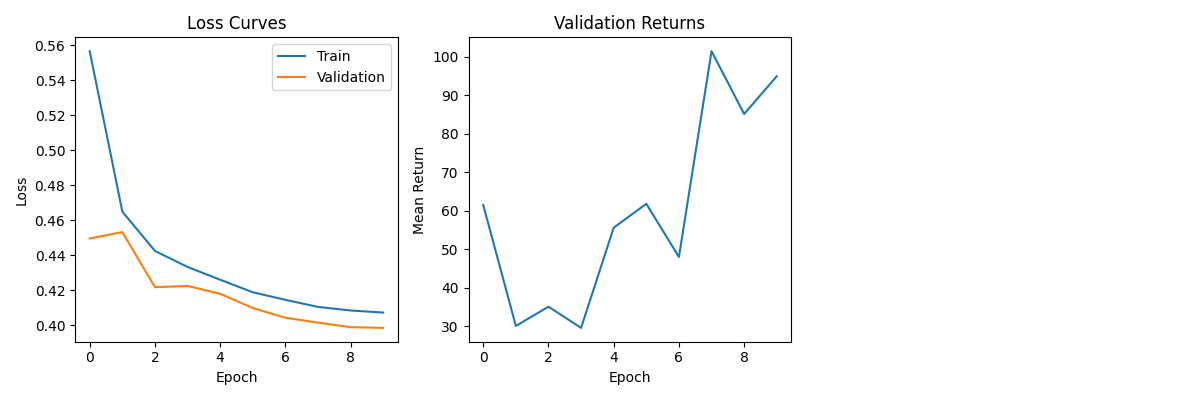

GRU

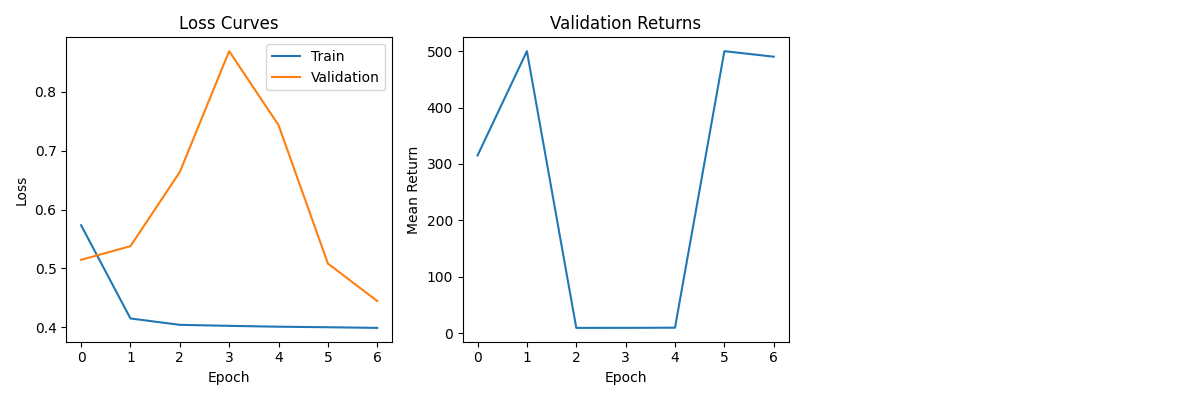

Без памяти

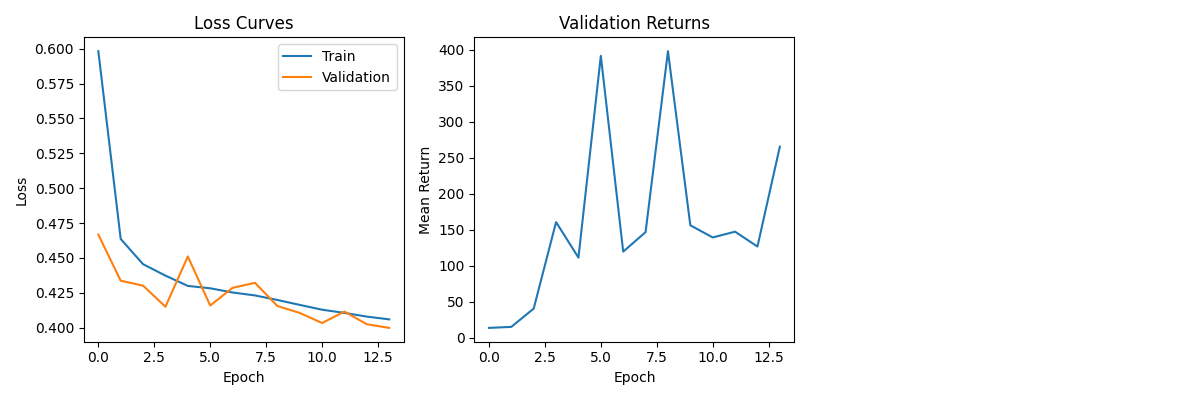

# Трансформер 

Я захотел написать трансформер, так как это почти всегда около сота + хочется понять, почему челы в статьях пишут, что лстм лучше

In [12]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type transformer --n_epochs 10 --eval_episodes 20

# Validate basic DT
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_transformer_best.pt --memory_type transformer 

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=48572, train=43714, val=4858, state_dim=2, actions=2
Epoch 1/10 [Train]: 100%|█| 684/684 [00:46<00:00, 14.77it/s, loss=0.2889, avg_lo
Epoch 1/10: Train Loss=0.5383, Val Loss=0.4333
Running environment validation...
Episode 1: Return=161.0, Steps=161
Episode 2: Return=163.0, Steps=163
Episode 3: Return=156.0, Steps=156
Episode 4: Return=500.0, Steps=500
Episode 5: Return=165.0, Steps=165
Episode 6: Return=171.0, Steps=171
Episode 7: Return=500.0, Steps=500
Episode 8: Return=192.0, Steps=192
Episode 9: Return=168.0, Steps=168
Episode 10: Return=347.0, Steps=347
Validation: Mean Return=252.30, Success Rate=20.00%
New best model with return 252.30
Epoch 2/10 [Train]: 100%|█| 684/684 [00:47<00:00, 14.40it/s, loss=0.4401, avg_lo
Epoch 2/10: Train Loss=0.4196, Val Loss=0.4031
Running environment validation...
Episode 1: Return=151.0, Steps=151
Episode 2: Return=465.0, Steps=465
Episode 3: Return=453.0, Steps=453

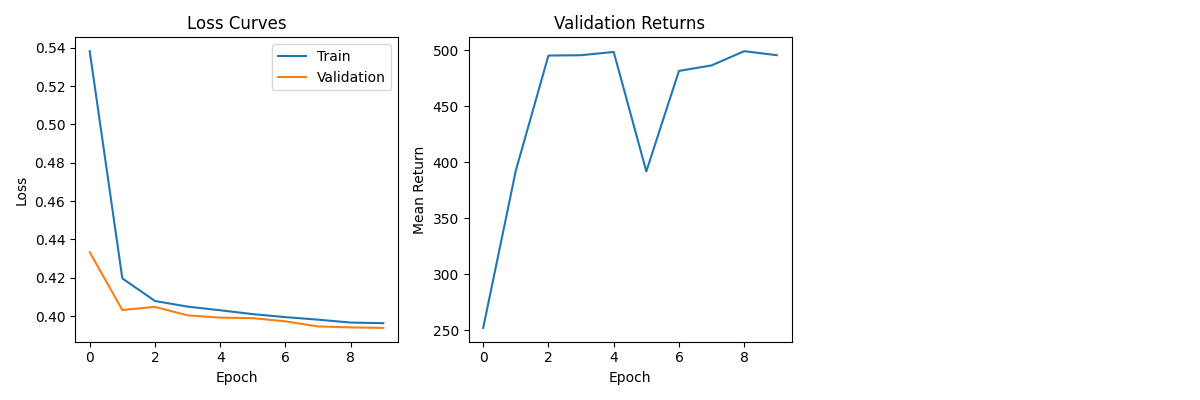

Трансформер сошелся идеально, чуть менее стабильно лстм, но зато резы супер высокие

Как будто здесь очень легкая среда + очень малое число координат и параметров 